In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
df_full = pd.read_csv('../../twitter_dataset/cleaned.csv', sep=';', encoding='cp437')
df_tag = pd.read_csv('../../twitter_dataset/cleaned_hashtag.csv', sep=';', encoding='cp437')
df_at = pd.read_csv('../../twitter_dataset/cleaned_identification.csv', sep=';', encoding='cp437')

C:\Users\bruno\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (1,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_full['day'] = df_full.createdAt.apply(lambda x : x[:10])
df_full['month'] = df_full.createdAt.apply(lambda x : x[:7])
df_full['year'] = df_full.createdAt.apply(lambda x : x[:4])
df_at['day'] = df_at.createdAt.apply(lambda x : x[:10])
df_at['month'] = df_at.createdAt.apply(lambda x : x[:7])
df_at['year'] = df_at.createdAt.apply(lambda x : x[:4])
df_tag['day'] = df_tag.createdAt.apply(lambda x : x[:10])
df_tag['month'] = df_tag.createdAt.apply(lambda x : x[:7])
df_tag['year'] = df_tag.createdAt.apply(lambda x : x[:4])

In [26]:
df_tag.head(20)

,Unnamed: 0,id,userId,createdAt,Longitude,Latitude,username,tag,at,day,month,year
0,8,9519737890,14657884,2010-02-23 09:59:41,\N,\N,Javier Belmonte,['#fb'],[],2010-02-23,2010-02,2010
1,10,9521789689,9962022,2010-02-23 11:28:27,\N,\N,Thomas Winter,['#yam'],[],2010-02-23,2010-02,2010
2,15,9535390586,921241,2010-02-23 17:47:11,\N,\N,Markus Tressl,"['#24', '#VfB']",[],2010-02-23,2010-02,2010
3,16,9536575795,14260616,2010-02-23 18:19:03,\N,\N,Roman Keller,['#iPhoneography'],[],2010-02-23,2010-02,2010
4,17,9537030723,14542024,2010-02-23 18:31:46,\N,\N,Joe Maffia,['#partnermonth'],['@evernote'],2010-02-23,2010-02,2010
5,23,9564394826,17910879,2010-02-24 06:09:23,\N,\N,Eloy Castro,"['#insider', '#fb']",[],2010-02-24,2010-02,2010
6,26,9566536362,14260616,2010-02-24 07:33:49,\N,\N,Roman Keller,['#Blick'],[],2010-02-24,2010-02,2010
7,35,9574517245,14328442,2010-02-24 12:58:35,\N,\N,johnbfagan,['#WIN'],[],2010-02-24,2010-02,2010
8,58,9611648082,17910879,2010-02-25 04:50:41,\N,\N,Eloy Castro,['#wach'],['@shibby'],2010-02-25,2010-02,2010
9,59,9611851919,13549872,2010-02-25 04:56:37,\N,\N,{Donmartino},"['#bwin', '#vancouver2010']",[],2010-02-25,2010-02,2010


In [5]:
def search_hashtag(tag, df):
    return df[(df["tag"].str.contains(tag))]


In [6]:
df_Charlie = search_hashtag("'#JeSuisCharlie'", df_tag)
df_Charlie

,Unnamed: 0,id,userId,createdAt,Longitude,Latitude,username,tag,at,day,month,year
2122740,13981873,552806885053988865,414754156,2015-01-07 12:40:06,46.5287,6.65208,Ad-exchange.fr,"['#CharlieHebdo', '#JeSuisCharlie']",[],2015-01-07,2015-01,2015
2122747,13981912,552807441407434752,448198451,2015-01-07 12:42:19,46.2048,6.14319,Johan Monterrat,"['#Cabu', '#CharlieHebdo', '#JeSuisCharlie']",[],2015-01-07,2015-01,2015
2122750,13981933,552807881012424705,448198451,2015-01-07 12:44:04,46.2048,6.14319,Johan Monterrat,"['#JeSuisCharlie', '#CharlieHebdo']",[],2015-01-07,2015-01,2015
2122753,13981986,552808602835369984,448198451,2015-01-07 12:46:56,46.2048,6.14319,Johan Monterrat,"['#Charb', '#CharlieHebdo', '#JeSuisCharlie']",[],2015-01-07,2015-01,2015
2122763,13982034,552809303636475904,129821394,2015-01-07 12:49:43,46.8031,7.15962,iBruno ?,"['#JeSuisCharlie', '#CharlieHebdo']",['@Charlie_Hebdo_'],2015-01-07,2015-01,2015
2122765,13982041,552809353657729024,391267192,2015-01-07 12:49:55,46.01,7.3331,brossette cedric,['#JeSuisCharlie'],[],2015-01-07,2015-01,2015
2122779,13982104,552810466050052096,634553,2015-01-07 12:54:20,46.1795,6.14126,David Roessli,"['#CharlieHebdo', '#JeSuisCharlie']",[],2015-01-07,2015-01,2015
2122788,13982138,552810870871703552,47965291,2015-01-07 12:55:57,46.8031,7.15962,Izanami,"['#CharlieHebdo', '#JeSuisCharlie']",[],2015-01-07,2015-01,2015
2122801,13982223,552812124133937152,448198451,2015-01-07 13:00:55,46.2048,6.14319,Johan Monterrat,"['#CharlieHebdo', '#Charb', '#Cabu', '#JeSuisC...",[],2015-01-07,2015-01,2015
2122822,13982374,552814433282846720,163045597,2015-01-07 13:10:06,46.3823,6.59175,Jacques Bechet,['#JeSuisCharlie'],['@sebdenice'],2015-01-07,2015-01,2015


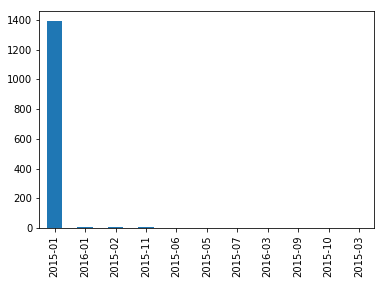

In [7]:
df_Charlie['month'].value_counts().plot.bar()
plt.show()

In [9]:
dfs = search_hashtag("'#newyearrocks'", df_tag)
dfs['day'].value_counts()

2014-01-02    38256
Name: day, dtype: int64

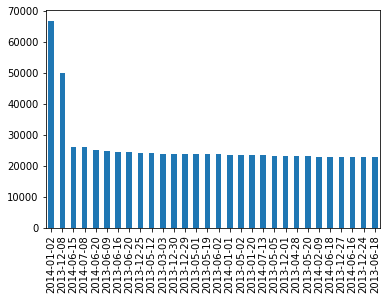

In [10]:
df_full['day'].value_counts()[:30].plot.bar()
plt.show()

In [27]:
def plot_frequency_tags(df, col, tag, n):
    dfs = search_hashtag(tag, df)
    dfs[col].value_counts()[:n].sort_index().plot.bar()
    plt.show()

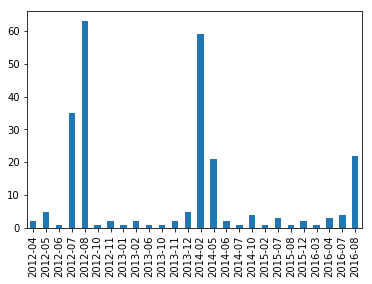

In [51]:
plot_frequency_tags(df_tag, 'month', "'#JO'", 30)

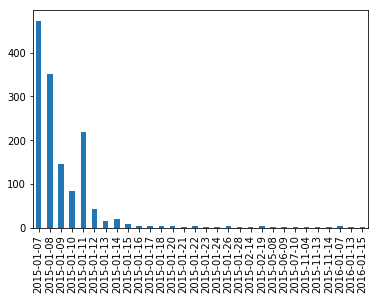

In [53]:
plot_frequency_tags(df_tag, 'day', "'#JeSuisCharlie'", 30)

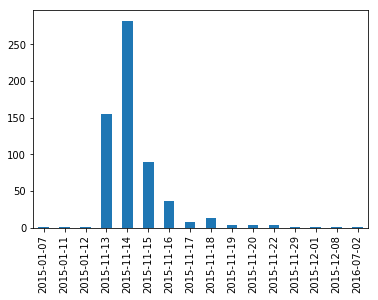

In [56]:
plot_frequency_tags(df_tag, 'day', "'#PrayForParis'", 30)

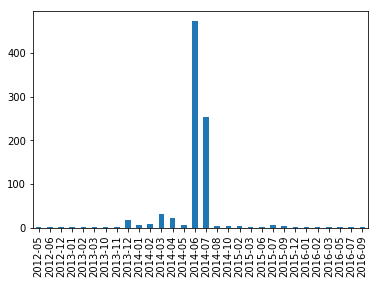

In [57]:
plot_frequency_tags(df_tag, 'month', "'#WorldCup'", 30)

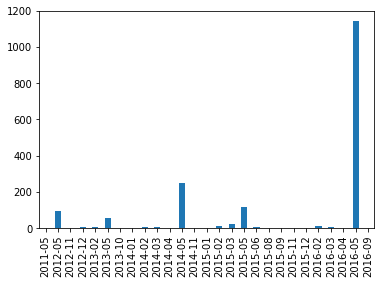

In [68]:
plot_frequency_tags(df_tag, 'month', "'#Eurovision'", 30)